# Análisis Exploratorio

Comenzaremos importando todas las librerías necesarias para realizar el análisis exploratorio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Datos

El conjunto de datos utilizado en este notebook es un conjunto de datos público disponible en el repositorio de datos de  Mendeley <a href='#data'>[1]</a>. Este conjunto de datos pertenece a un estudio realizado en el Centro Médico Universitario de Liubliana, Eslovenia <a href='#paper'>[2]</a>.  

El dataset contiene información extraída de embarazadas en la 24-37 semana de gestación. En concreto, se recogen 22 carácterísticas:

* <code>Patient number</code>: identificador
* <code>Maternal age</code>: Edad de la madre
* <code>Parity</code>: número de veces que ha dado a luz (**Nota**: las mujeres que daban a luz por primera vez se consideron con el valor 1, ya que se recogieron datos hasta el momento del parto). 
* <code>Pre-pregnancy weight </code>: Peso antes del embarazo (en kilos)
* <code>Maternal height</code>: Altura embarazada (en metros)
* <code>BMI before pregnanciy</code>: Índice de masa corporal antes del embarazo
* <code>Art ut. D-resistance index [RI]</code>: Índice de resistencia de la arteria uterina derecha
* <code>Art ut. L-resistance index [RI]</code>: Índice de resistencia de la arteria uterina izquierda
* <code>Mean RI</code>: Índice de resistencia medio
* <code>Art ut. D-pulsatility index [PI]</code>: Índice de pulsatilidad de la arteria uterina derecha
* <code>Art ut. L-pulsatility index [PI]</code>: Índice de pulsatilidad de la arteria uterina izquierda
* <code>Mean PI</code>: Índice de pulsatilidad medio
* <code>Velocidad sistólica pico de la arteria uterina derecha</code>: Número decimal
* <code>Art ut. L-Peak Systolic Velocity [PSV]</code>: Velocidad sistólica pico de la arteria uterina izquierda
* <code>Mean PSV</code>: Velocidad sistólica pico media
* <code>Bilateral notch</code>: Presencia o ausencia de una escotadura protodiastólica (notch). El valor puede ser 1 si es unilateral, 2 si es bilateral y 0 si no hay ningún *notch*.
* <code>Gestational age at delivery</code>: Edad gestacional en el momento del parto (en semanas). 
* <code>Weight</code>: Peso del neonato (en gramos)
* <code>S-Flt1 </code>: Niveles séricos de la tirosina quinasa 1 soluble similar a fms (sFlt-1). Unidad: µg/L
* <code>S-PLGF </code>: Factor de crecimiento placentario. Unidad: µg/L
* <code>sFLT/PLGF</code>: Ratio
* <code>class</code>: Clase. Puede ser: control (embarazadas sin ningún tipo de PDDs), PE (preemclampsia), IUGR (restricción del crecimiento intrauterino) y PE-IUGR (padece ambas enfermedades).

El objetivo es obtener un modelo capaz de predecir los trastornos relacionados con la disfunción placentaria (en inglés, Placental Dysfunction–related Disorders), en concreto preeclampsia y la restricción del crecimiento intrauterino. 




## Lectura de datos



No podemos cargar directamente el excel descargado con los datos por las siguientes razones:
* Tiene doble cabecera
* Los datos se encuentran agrupados por clase, y para cada grupo se añade una fila adicional con el valor medio de las siguientes columnas: *mean RI, mean PSV, S-Flt1, S-PLGF y	sFLT/PLGF*.  

Como el conjunto de datos es pequeño, vamos a editarlo de forma manual. Las ediciones van a ser las siguientes:
* Se va a dejar una única cabecera, y se va a añadir nombre a la columna de la clase para facilitar la carga de los datos.
* Se van a eliminar las filas con los valores medios de las columnas *mean RI, mean PSV, S-Flt1, S-PLGF y	sFLT/PLGF*.  

Una vez completada esta edición, podemos cargar los datos sin ningún tipo de problema con la librería **pandas**.

In [192]:
data = pd.read_excel("data/datos.xlsx" )

In [193]:
data.head()

,Patient nuber,Materna age [years],Pre-pregnancy weight [kg],Maternal hight [m],BMI [kg/m²],Art ut. D-resistance index [RI],Art ut. D-pulsatility index [PI],Art ut. D-Peak Systolic Velocity [PSV],Art ut. L-resistance index [RI],Art ut. L-pulsatility index [PI],...,Mean PI,Mean PSV,Bilateral notch,Gestational age at delivery [weeks],Parity,Birth weight [g],S-Flt1 [µg/L],S-PLGF [µg/L],sFLT/PLGF,Class
0,2 DM,37,58.0,1.70,20.069204,0.43,0.56,65.3,0.49,0.60,...,0.580,59.6,0,37.285714,1,3060,11511,102.8,111.974708,Control
1,650387,35,46.0,1.64,17.102915,0.40,0.54,62.5,0.67,0.73,...,0.635,67.7,0,36.714286,3,2780,3146,752.8,4.179065,Control
2,650394,34,64.0,1.75,20.897959,0.41,0.60,59.7,0.53,0.62,...,0.610,61.0,0,35.142857,1,2450,3858,203.2,18.986220,Control
3,678474,31,49.0,1.52,21.208449,0.65,0.97,61.5,0.59,0.99,...,0.980,64.8,0,36.428571,2,2490,995,1051.0,0.946717,Control
4,653633,31,66.0,1.60,25.781250,0.62,0.88,58.1,0.59,0.76,...,0.820,58.6,0,32.142857,1,1905,1667,1440.0,1.157639,Control


In [194]:
data.columns

Index(['Patient nuber', 'Materna age [years]', 'Pre-pregnancy weight [kg]',
       ' Maternal hight [m]', 'BMI [kg/m²]', 'Art ut. D-resistance index [RI]',
       'Art ut. D-pulsatility index [PI]',
       'Art ut. D-Peak Systolic Velocity [PSV]',
       'Art ut. L-resistance index [RI]', 'Art ut. L-pulsatility index [PI]',
       'Art ut. L-Peak Systolic Velocity [PSV]', 'Mean RI', 'Mean PI',
       'Mean PSV', 'Bilateral notch', 'Gestational age at delivery [weeks]',
       'Parity', 'Birth weight [g]', 'S-Flt1 [µg/L]', 'S-PLGF [µg/L]',
       'sFLT/PLGF', 'Class'],
      dtype='object')

Vamos a eliminar la columna de **Patient nuber** ya que se trata solo de un número utilizado para identificar a cada paciente 

In [195]:
data.drop('Patient nuber', axis=1, inplace=True)

Además, vamos a renombrar las  columnas del dataframe para facilitar el acceso a ellas. 

In [196]:
data.columns=["age", "weight", "height", "BMI", "R-RI", "R-PI", "R-PSV", "L-RI", "L-PI", "L-PSV", "meanRI", "meanPI", "meanPSV", "bilateralNotch", "age_delivery", "parity", "birth_weight", "S-Flt1", "S-PLGF", "sFLT/PLGF", "class"] 

In [162]:
data.head(5)

,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,...,meanPI,meanPSV,bilateralNotch,age_delivery,parity,birth_weight,S-Flt1,S-PLGF,sFLT/PLGF,class
0,37,58.0,1.70,20.069204,0.43,0.56,65.3,0.49,0.60,53.9,...,0.580,59.6,0,37.285714,1,3060,11511,102.8,111.974708,Control
1,35,46.0,1.64,17.102915,0.40,0.54,62.5,0.67,0.73,72.9,...,0.635,67.7,0,36.714286,3,2780,3146,752.8,4.179065,Control
2,34,64.0,1.75,20.897959,0.41,0.60,59.7,0.53,0.62,62.3,...,0.610,61.0,0,35.142857,1,2450,3858,203.2,18.986220,Control
3,31,49.0,1.52,21.208449,0.65,0.97,61.5,0.59,0.99,68.1,...,0.980,64.8,0,36.428571,2,2490,995,1051.0,0.946717,Control
4,31,66.0,1.60,25.781250,0.62,0.88,58.1,0.59,0.76,59.1,...,0.820,58.6,0,32.142857,1,1905,1667,1440.0,1.157639,Control


## Tipo de variables

Vamos a estudiar qué tipos de variables tenemos en el dataset. 

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 21 columns):
age               95 non-null int64
weight            94 non-null float64
height            94 non-null float64
BMI               92 non-null float64
R-RI              95 non-null float64
R-PI              95 non-null float64
R-PSV             95 non-null float64
L-RI              95 non-null float64
L-PI              95 non-null float64
L-PSV             95 non-null float64
meanRI            95 non-null float64
meanPI            95 non-null float64
meanPSV           93 non-null float64
bilateralNotch    95 non-null int64
age_delivery      95 non-null float64
parity            95 non-null int64
birth_weight      95 non-null object
S-Flt1            95 non-null int64
S-PLGF            95 non-null float64
sFLT/PLGF         95 non-null float64
class             95 non-null object
dtypes: float64(15), int64(4), object(2)
memory usage: 15.7+ KB


Como se puede observar, hemos obtenido que dos variables son de tipo _object_. Veámos esto en más profundidad 

In [197]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars

['birth_weight', 'class']

La columna **class** es efectivamente categórica, pero la variable **birth_weight** debería ser del tipo _float_ ya que se trata del peso del neonato. Veámos qué está ocurriendo. Para ello, vamos a ver los distintos valores que puede adoptar el peso del neonato.

In [165]:
data["birth_weight"].unique()

array([3060, 2780, 2450, 2490, 1905, 2180, 1910, 2600, 3110, 1510, 3550,
       3310, 3600, 2860, 2650, 3575, 1890, 3090, 3700, 2890, 2430, 3890,
       3750, 3250, 3560, 1790, 3610, 1250, 3500, 430, 1470, 2050, 1700,
       1680, 1930, 500, 1760, 530, 1210, 985, 780, 1200, 980, 1140, 1950,
       965, 830, 810, 2460, 1800, 1970, 2810, 2120, 3175, 1050, 1345,
       1480, 1280, 1150, 'MFIU', 890, 2940, 1840, 720, 1135, 650, 2160,
       930, 3070, 220, 4040, 3800, 1690, 3170, 3040, 37, 1610, 2100, 1020,
       4000, 3030, 850, 3300, 2950, 2440, 427, 2930, 1570, 1180],
      dtype=object)

Vemos que uno de los valores es **MFIU**. Este valor es de tipo String, y había provocado que se detectara la columna del tipo object. MFIU significa **muerte fetal intrauterina**. Vamos a cambiar este valor por el valor 0, y vamos a transformar el atributo en numérico.

In [198]:
data.loc[data.birth_weight=='MFIU','birth_weight']=0

data["birth_weight"]= pd.to_numeric(data["birth_weight"])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 21 columns):
age               95 non-null int64
weight            94 non-null float64
height            94 non-null float64
BMI               92 non-null float64
R-RI              95 non-null float64
R-PI              95 non-null float64
R-PSV             95 non-null float64
L-RI              95 non-null float64
L-PI              95 non-null float64
L-PSV             95 non-null float64
meanRI            95 non-null float64
meanPI            95 non-null float64
meanPSV           93 non-null float64
bilateralNotch    95 non-null int64
age_delivery      95 non-null float64
parity            95 non-null int64
birth_weight      95 non-null int64
S-Flt1            95 non-null int64
S-PLGF            95 non-null float64
sFLT/PLGF         95 non-null float64
class             95 non-null object
dtypes: float64(15), int64(5), object(1)
memory usage: 15.7+ KB


En cuanto a las variables numéricas, veamos cuáles son continuas y cuáles discretas.

In [199]:
disc_vars = [var for var in data.columns if data[var].dtype == 'int64']
disc_vars

['age', 'bilateralNotch', 'parity', 'birth_weight', 'S-Flt1']

Las variables **S-Flt1** y **birth_weight** debería ser del tipo float. 

In [200]:
data["S-Flt1"]= data["S-Flt1"].astype(float)

In [201]:
data["birth_weight"]= data["birth_weight"].astype(float)

En cuanto a la variable **bilateralNotch**, vamos a considerarla de tipo categórica. Esta variable puede tomar tres valores distintos:
* 0 : no existe 
* 1: existe en un lado
* 2: existe en ambos


In [202]:
data["bilateralNotch"]= data["bilateralNotch"].astype(object)

**Age** y **parity** si son de tipo int. Veamos a continuación las continuas.

In [203]:
cont_vars = [var for var in data.columns if data[var].dtype == 'float64']
cont_vars

['weight',
 'height',
 'BMI',
 'R-RI',
 'R-PI',
 'R-PSV',
 'L-RI',
 'L-PI',
 'L-PSV',
 'meanRI',
 'meanPI',
 'meanPSV',
 'age_delivery',
 'birth_weight',
 'S-Flt1',
 'S-PLGF',
 'sFLT/PLGF']

## Número de observaciones y valores ausentes

In [204]:
data.shape

(95, 21)

Como se puede observar, está compuesto por 21 atributos (columnas) y 95 instancias (filas). Veamos ahora la descripción estadística de los datos numéricos.

Comprobamos si existen filas duplicadas.

In [205]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 21)


No existen filas duplicadas. Ahora comprobamos el número de valores nulos para cada columna.

In [174]:
data.isnull().sum()

age               0
weight            1
height            1
BMI               3
R-RI              0
R-PI              0
R-PSV             0
L-RI              0
L-PI              0
L-PSV             0
meanRI            0
meanPI            0
meanPSV           2
bilateralNotch    0
age_delivery      0
parity            0
birth_weight      0
S-Flt1            0
S-PLGF            0
sFLT/PLGF         0
class             0
dtype: int64

Existen valores nulos en las columnas **weight, height, BMI** y **meanPSV**. Veámos las filas que contienen valores nulos.

In [140]:
nulos = data[data.isnull().any(1)]

In [141]:
nulos

,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,...,meanPI,meanPSV,bilateralNotch,age_delivery,parity,birth_weight,S-Flt1,S-PLGF,sFLT/PLGF,class
58,43,66.0,1.52,NaN,0.63,0.60,67.4,0.59,0.67,62.9,...,0.635,65.15,0,32.714286,1,1480.0,27390.0,153.60,178.320312,IUGR_PE
59,36,52.0,1.64,NaN,0.67,0.81,57.9,0.69,0.89,61.4,...,0.850,59.65,1,34.714286,1,1280.0,29805.0,79.73,373.824157,IUGR_PE
61,26,NaN,NaN,NaN,0.84,2.02,68.8,0.83,2.28,59.4,...,2.150,64.10,1,28.000000,1,0.0,10015.0,42.64,234.873358,IUGR
93,30,53.0,1.57,21.501886,0.49,0.52,60.4,0.51,0.56,58.1,...,0.540,NaN,0,34.142857,1,1570.0,10535.0,34.97,301.258221,PE
94,26,74.0,1.65,27.180900,0.69,0.62,54.9,0.73,0.71,60.5,...,0.665,NaN,2,30.428571,1,1180.0,12154.0,15.84,767.297980,PE


Vemos que en las filas 58 y 59 falta el valor de la columna **BMI**. El **BMI** indica el índice masa corporal, que se calcula dividiendo el peso entre la altura al cuadrado. Estos dos valores ausentes serán calculados usando las columnas **weight y height**.  
En la columna 61, falta tanto el **BMI** como **weight** y **height**. Para las columnas **weight** y **height**, calcularemos el valor medio de cada columna y lo sustituiremos por el valor nulo. En cuanto el valor ausente del **BMI**, haremos como en el primer caso y lo sustituiremos por el valor de **weight** dividido entre el valor de **height** al cuadrado correspondiente.  
Por último, en la fila 93 y 94 tienen ausente el valor de **meanPSV**. El valor de esta columna corresponde con el valor medio de las columnas **R-PSV** y **L-PSV**. Calcularemos este valor medio para sustituir al valor NaN.

## Clase

En este apartado, vamos a estudiar la clase del dataset.

In [206]:
data["class"].unique()

array(['Control', 'IUGR_PE', 'IUGR', 'PE'], dtype=object)

In [207]:
data["class"].value_counts()

IUGR_PE    32
Control    29
PE         22
IUGR       12
Name: class, dtype: int64

La clase puede tener cuatro valores distintos: *Control, IUGR_PE, IUGR y PE*. Por lo tanto, nos encontramos frente a un problema de clasificación multiclase. 

| Variable | Descripción |Número de pacientes|
| :- | :- | :- |
| IUGR_PE | Preeclampsia y restricción intrauterina del incremento | 32 |
| Control| No padece ninguna de las dos enfermedades | 29 |
| PE    | Preeclampsia | 22 |
| IUGR    | Restricción intrauterina del incremento | 12 |

Visualicemos cómo sería la distribución de la clase.

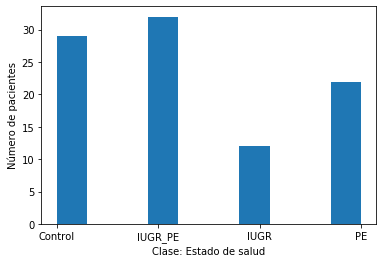

In [208]:
data["class"].hist(grid=False)
plt.xlabel("Clase: Estado de salud")
plt.ylabel("Número de pacientes")
plt.show()

Vemos que la clase se encuentra desbalanceada (sobre todo para el valor IUGR).

## Variables numéricas

In [23]:
data.describe()

,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,age_delivery,parity,birth_weight,S-Flt1,S-PLGF,sFLT/PLGF
count,95.000000,94.000000,94.000000,92.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.00000,93.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,32.147368,67.531915,1.655638,24.616912,0.639474,1.063158,60.809053,0.655895,1.102842,61.128000,0.647684,1.08300,61.022151,33.871278,1.536842,2028.621053,13156.200000,302.825789,243.129174
std,5.084328,14.354724,0.062554,4.800613,0.126444,0.501891,6.709441,0.108437,0.470865,6.076082,0.112455,0.47324,5.705277,4.417592,0.920344,1064.507440,13824.935398,383.390465,351.790952
min,21.000000,46.000000,1.500000,17.102915,0.400000,0.450000,47.800000,0.430000,0.520000,46.800000,0.420000,0.54000,50.200000,22.000000,1.000000,0.000000,995.000000,10.050000,0.946717
25%,29.000000,58.000000,1.620000,21.441041,0.560000,0.645000,56.700000,0.590000,0.695000,57.800000,0.570000,0.67000,57.600000,31.000000,1.000000,1137.500000,3623.500000,54.020000,7.367625
50%,32.000000,65.000000,1.660000,23.529412,0.670000,0.870000,59.100000,0.670000,0.890000,60.200000,0.670000,0.93500,60.200000,34.142857,1.000000,1910.000000,9530.000000,105.900000,119.728305
75%,36.000000,74.000000,1.700000,26.241408,0.735000,1.485000,63.250000,0.755000,1.530000,64.100000,0.750000,1.46750,62.450000,37.428571,2.000000,2945.000000,17947.000000,448.550000,362.884861
max,47.000000,113.000000,1.800000,39.682540,0.840000,2.490000,89.800000,0.830000,2.280000,89.800000,0.835000,2.21500,88.650000,41.142857,6.000000,4040.000000,74283.000000,1607.000000,2297.421203


In [209]:
columnas_numeric = data.select_dtypes(include=['float64', 'int64']).columns
len(columnas_numeric)

19

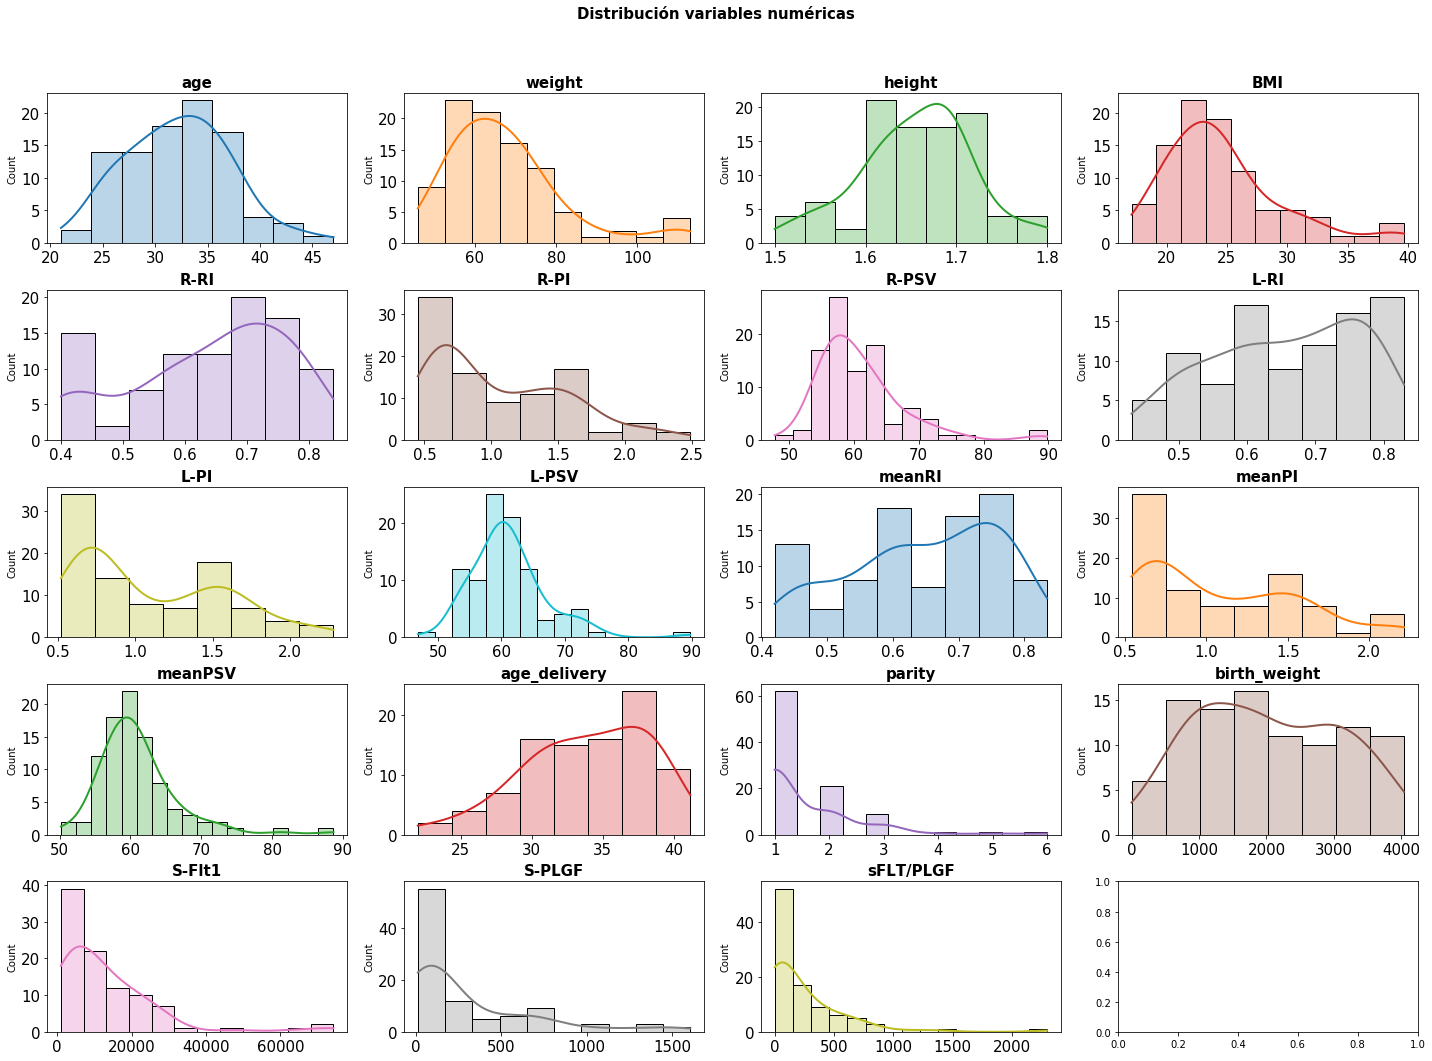

In [210]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = data,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 15)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 15, fontweight = "bold");

La variable <code>parity</code> toma muy pocos valores, y la mayoría se de los casos se encuentra en los valores 1, 2 y 3.

In [179]:
data['parity'].value_counts()

1    62
2    21
3     9
6     1
5     1
4     1
Name: parity, dtype: int64

Por lo tanto, vamos a tratar esta variable como categórica.

In [211]:
data["parity"]= data["parity"].astype(object)

## Correlación entre variables numéricas

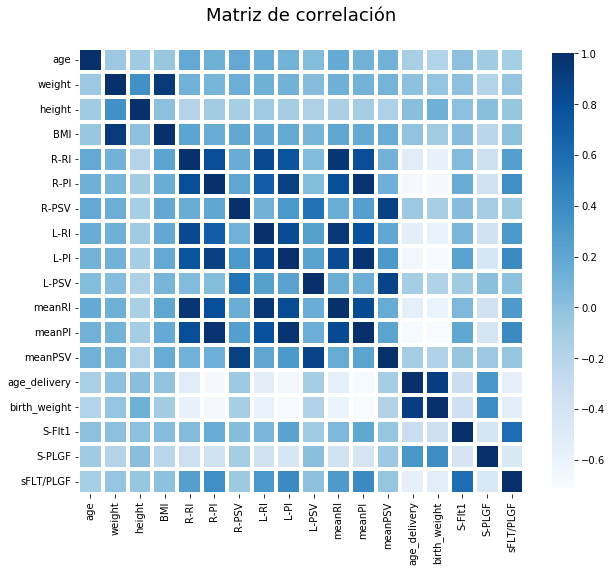

In [148]:
fig, ax = plt.subplots(figsize=(10, 10))# plot heatmap
corr = data.corr()
graph=sns.heatmap(corr, cmap="Blues", linewidth=3, square= True,cbar_kws={"shrink": .8})

title = 'Matriz de correlación\n'
bottom, top = graph.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title(title, fontsize=18)
plt.show()

In [149]:
corr_matrix = data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

In [150]:
correlacion =pd.DataFrame(sol, columns=["Correlación"])
correlacion.head(15)

,,Correlación
R-PI,meanPI,0.974681
L-PI,meanPI,0.971184
R-RI,meanRI,0.963732
L-RI,meanRI,0.950348
weight,BMI,0.931485
age_delivery,birth_weight,0.911202
R-PSV,meanPSV,0.896657
R-PI,L-PI,0.893303
L-PSV,meanPSV,0.873123
R-RI,L-RI,0.832834


Vemos que hay variables númericas altamenet correladas. Algunos modelos se ven perjudicados si se incorporaan predictores altamente correlacionados. Por ello, sería conveniente eliminar las columnas que contienen información sobre otras columnas (por ejemplo, <code>meanPSV</code> que es el valor medio de <code>R-PSV</code> y <code>L-PSV</code>), ya que no aportan información nueva y podrían introducir ruido.

Relación entre la clase y variables numéricas:

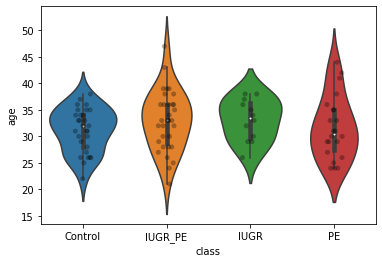

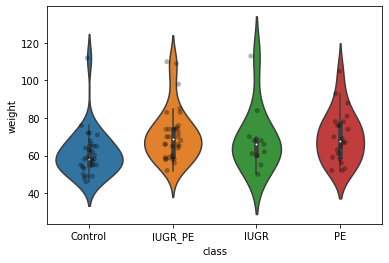

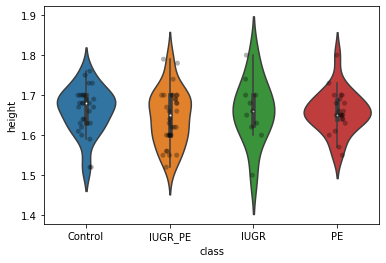

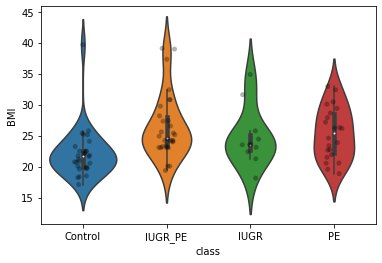

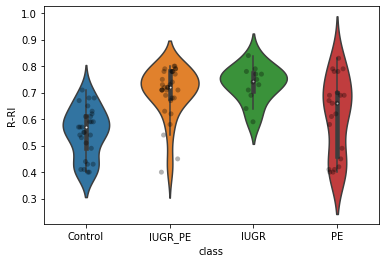

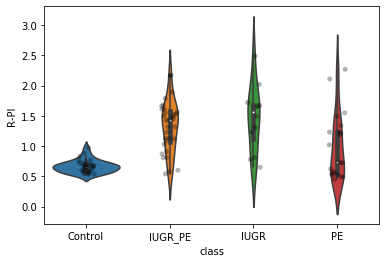

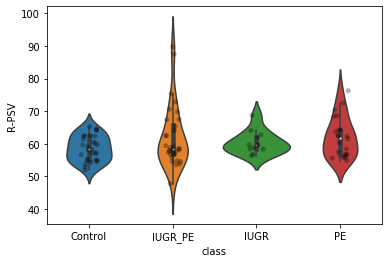

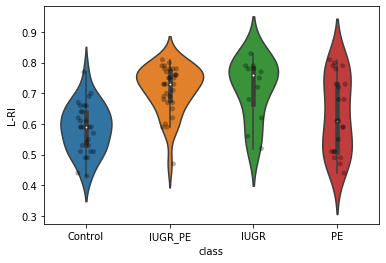

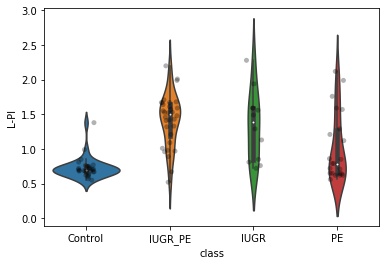

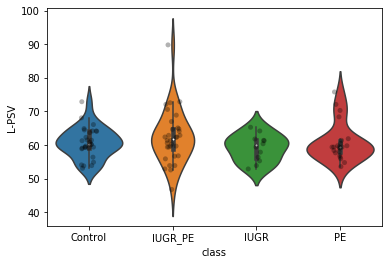

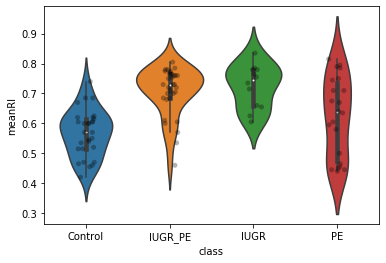

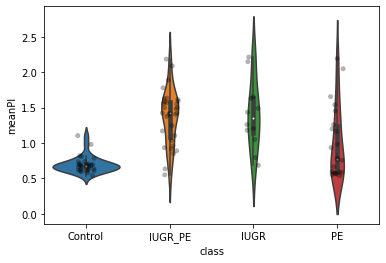

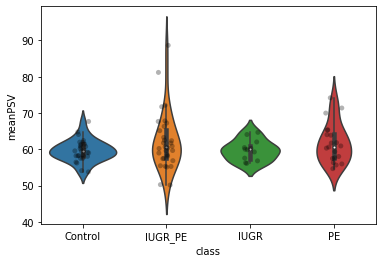

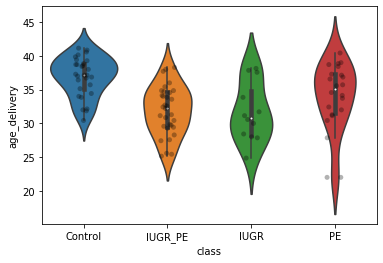

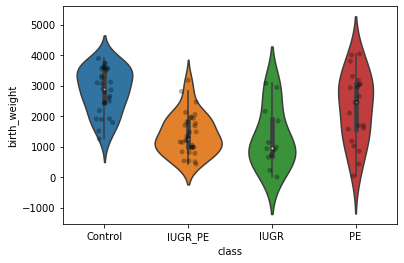

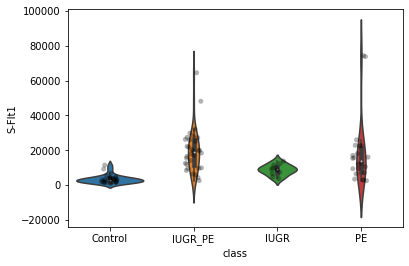

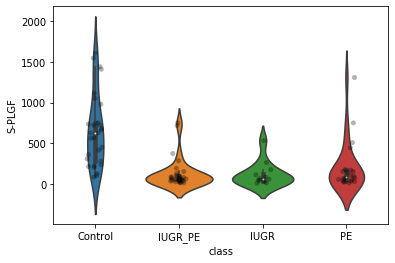

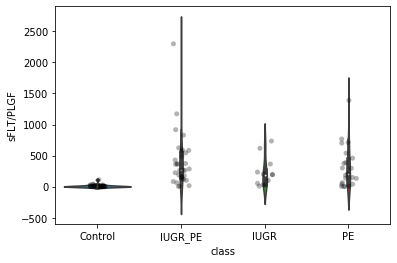

In [230]:
num_vars = data.select_dtypes(include=['float64','int64']).columns

for var in num_vars:
    # make boxplot with Catplot
    sns.violinplot(x='class', y=var, data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x='class', y=var, data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

## Variables categóricas

In [212]:
data.select_dtypes(include=['object']).describe()

,bilateralNotch,parity,class
count,95,95,95
unique,3,6,4
top,0,1,IUGR_PE
freq,48,62,32


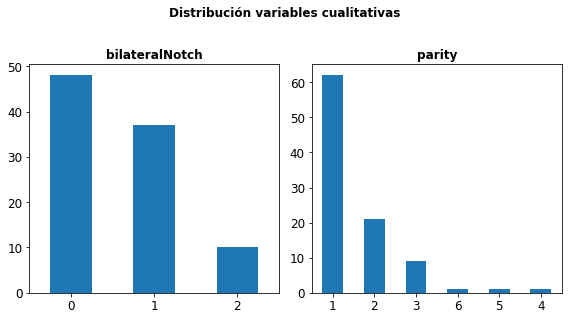

In [182]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes = axes.flat
columnas_object = data.select_dtypes(include=['object']).columns
columnas_object= columnas_object.drop('class')

for i, colum in enumerate(columnas_object):
    
    data[colum].value_counts().plot.bar(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 12, labelrotation=0)
    axes[i].set_xlabel("")
    


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 12, fontweight = "bold", y=1.1);



In [213]:
data.groupby(['class','bilateralNotch'])['bilateralNotch'].value_counts()

class    bilateralNotch  bilateralNotch
Control  0               0                 29
IUGR     0               0                  1
         1               1                  8
         2               2                  3
IUGR_PE  0               0                  4
         1               1                 23
         2               2                  5
PE       0               0                 14
         1               1                  6
         2               2                  2
Name: bilateralNotch, dtype: int64

En la variable <code>bilateralNotch</code> nos encontramos con muy pocos ejemplos para el caso del notch bilateral (valor 2). Vamos a transformar esta columna en binaria, tomando como **1** la presencia de un notch (ya sea unilateral o biltateral), y **0** la ausencia de este.

In [214]:
data['notch']= data['bilateralNotch'].map({0:"0", 1:"1", 2:"1"})
data= data.drop('bilateralNotch', axis=1)

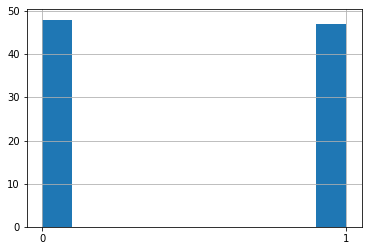

In [216]:
data["notch"].hist()

In [217]:
data['notch'].isnull().sum()

0

En cuanto a <code>parity</code>, vamos a considerarla binaria también. Vamos a determinar que el valor **0** va a corresponder a las madres primerizas, es decir, que van a dar luz por primera vez (valor de <code>parity</code> 1), y **1** a las embarazadas que hayan dado a luz antes, independientemente del número de veces (englobaría los valores de <code>parity</code> 2,3,4,5 y 6).

In [191]:
data.groupby(['class','parity'])['parity'].value_counts()

class    parity  parity
Control  1       1         15
         2       2         10
         3       3          4
IUGR     1       1          8
         2       2          3
         3       3          1
IUGR_PE  1       1         22
         2       2          5
         3       3          3
         4       4          1
         5       5          1
PE       1       1         17
         2       2          3
         3       3          1
         6       6          1
Name: parity, dtype: int64

In [218]:
data['multiparity']= data['parity'].map({1:"0", 2:"1", 3:"1", 4:"1", 5:"1", 6:"1"})


In [220]:
data['multiparity'].isnull().sum()

0

In [221]:
data= data.drop('parity', axis=1)

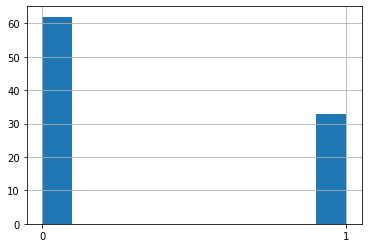

In [222]:
data['multiparity'].hist()

## Visualizaciones

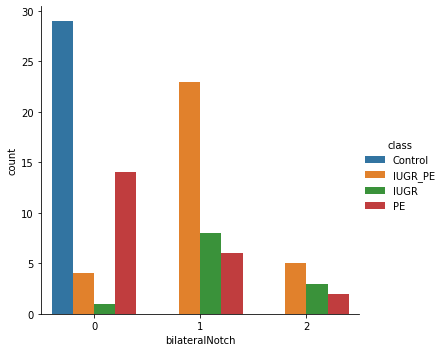

In [158]:
sns.catplot(x="bilateralNotch", hue="class", kind="count",  data=data)


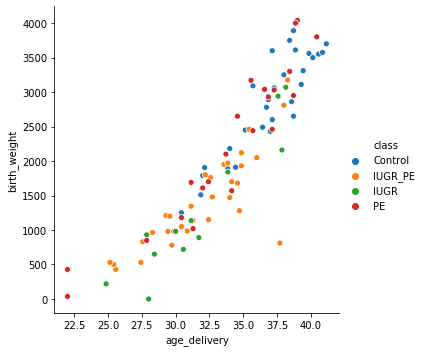

In [151]:
sns.relplot(x="age_delivery", y="birth_weight", hue="class", data=data);

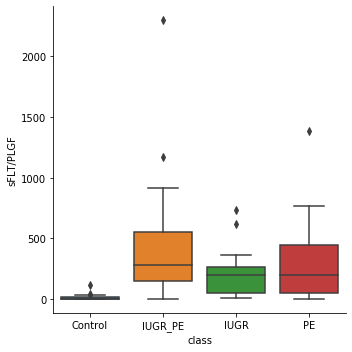

In [141]:
sns.catplot(y= "sFLT/PLGF" , x='class', data=data, orient="v", kind="box")



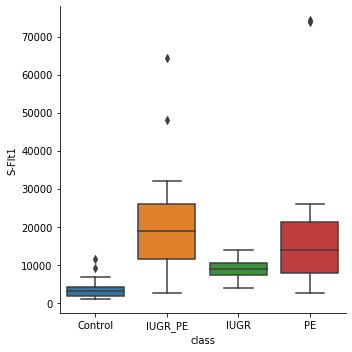

In [146]:
sns.catplot(y= "S-Flt1" , x='class', data=data, orient="v", kind="box")

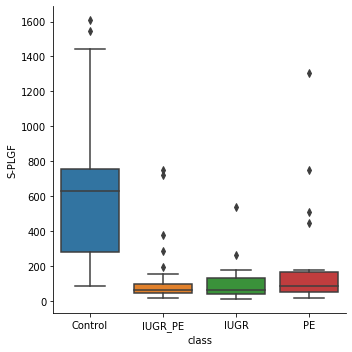

In [147]:
sns.catplot(y= "S-PLGF" , x='class', data=data, orient="v", kind="box")


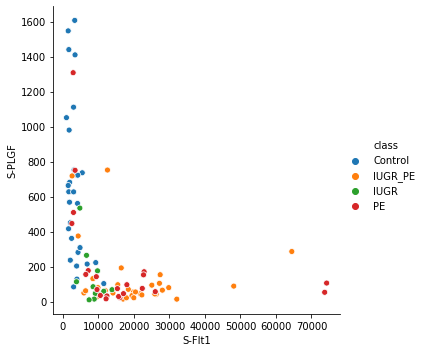

In [159]:
sns.relplot(x="S-Flt1", y="S-PLGF", hue="class", data=data);

## Fuentes bibliográficas  
<br></br>
<div class="csl-entry"><a name='data'>[1]</a> Premru-Srsen, T., &#38; Tanja Premru-Srsen, T. (2018). <i>Uterine arteries Doppler and sFlt-1/PlGF ratio in hypertensive disorders during pregnancy</i>. <i>1</i>. https://doi.org/10.17632/ZSJHVY9YTX.1</div>  

<br></br>
<div class="csl-entry"><a name='paper'>[2]</a>V, F.-V., K, K., J, O., I, V., K, G., &#38; T, P.-S. (2019). Correlation between uterine artery Doppler and the sFlt-1/PlGF ratio in different phenotypes of placental dysfunction. <i>Hypertension in Pregnancy</i>, <i>38</i>(1), 32–40. https://doi.org/10.1080/10641955.2018.1550579 </div>